In [1]:
from linares_plot import *

In [2]:
data = pd.read_csv('C:\\Users\\David\\Dropbox\\IDIBAPS\\my code\\Project 1 (master thesis)\\idibaps_psychophysics')
df=data.loc[(data['type']==0)] ##controls

In [4]:
df.head()

,Unnamed: 0,r_T,r_NT,delay,type,A_T,A_NT,A_err,r_err,A_R,r_R,subject,session,Int_A_err,Int_r_err
0,0,13.68,NaN,0.0,0.0,314.0,NaN,-1.90,1.81,315.90,11.87,1,1,NaN,NaN
2,2,10.70,NaN,3.0,0.0,50.0,NaN,6.38,2.97,43.62,7.73,1,1,NaN,NaN
5,5,13.68,NaN,0.0,0.0,129.0,NaN,-10.73,0.62,139.73,13.06,1,1,NaN,NaN
6,6,13.68,NaN,3.0,0.0,304.0,NaN,4.01,0.96,299.99,12.72,1,1,NaN,NaN
7,7,13.68,NaN,3.0,0.0,215.0,NaN,-1.36,-1.49,216.36,15.17,1,1,NaN,NaN


C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


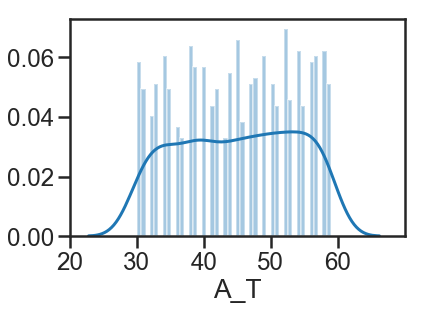

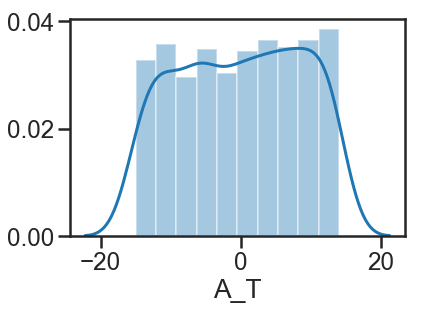

In [17]:
## I have to substract the diagnonal value in each quadrant
sns.distplot(df.loc[df['A_T']<90].A_T, bins=45)
plt.xlim(20,70)
plt.xticks([20,30,40,50,60])
plt.show()

sns.distplot(df.loc[df['A_T']<90].A_T - 45)

In [45]:
def get_quadrant(a):
    if a>0 and a<90:
        q=1
    elif a >90 and a<180:
        q=2
    elif a>180 and a <270:
        q=3
    elif a>270 and a <360:
        q=4
    
    return(q)
##
#check
print(get_quadrant(20))
print(get_quadrant(120))
print(get_quadrant(220))
print(get_quadrant(320))

1
2
3
4


In [129]:
df['quadrant'] = [get_quadrant(df.iloc[i].A_T) for i in range(len(df))]

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [56]:
A_T_aligned_center = []

for i in range(len(df)):
    trial = df.iloc[i]
    a = trial.A_T
    q = get_quadrant(a)
    if q==1:
        a_t_aligned = a-45
    elif q==2:
        a_t_aligned = (a-135)*-1
    elif q==3:
        a_t_aligned = a-225    
    elif q==4:
        a_t_aligned = (a-315) *-1 ##hay que hacer esto porque asi positie A_err van siempre hacia el vertical  
    ##
    A_T_aligned_center.append(a_t_aligned)

#
#
df['A_T_aligned_center'] = A_T_aligned_center

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


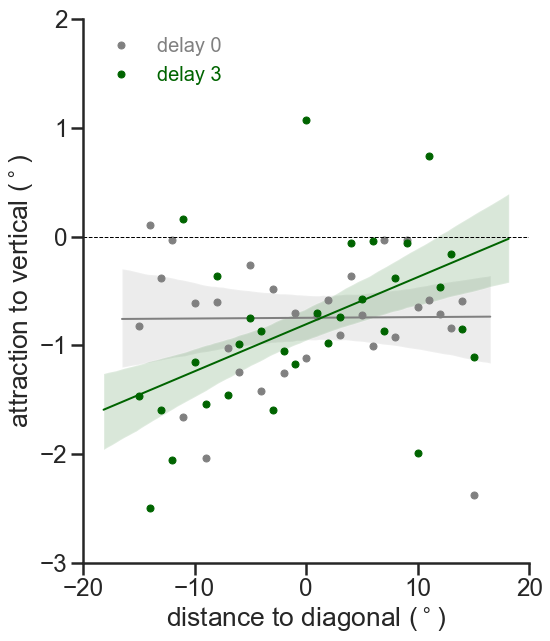

In [161]:
d_0 = []
for d in df.loc[df['delay']==0 ,'A_T_aligned_center'].unique():
    d0_mean = df.loc[(df['A_T_aligned_center']==d) & (df['delay']==0)].A_err.mean()
    d_0.append([d, d0_mean])
#
d_0 = np.array(d_0)


d_3 = []
for d in df.loc[df['delay']==3 ,'A_T_aligned_center'].unique():
    d3_mean = df.loc[(df['A_T_aligned_center']==d) & (df['delay']==3)].A_err.mean()
    d_3.append([d, d3_mean])

#
d_3 = np.array(d_3)



fig = plt.figure(figsize=(8,10))

sns.regplot('A_T_aligned_center', 'A_err', df.loc[df['delay']==0], 
            line_kws={'linewidth':2}, color='grey',  scatter_kws={'s':0},
            ci = 95)

plt.plot(d_0[:,0], d_0[:,1], 'o', color='grey', label='delay 0', markersize=7)


sns.regplot('A_T_aligned_center', 'A_err', df.loc[df['delay']==3],
            line_kws={'linewidth':2}, color='darkgreen',  scatter_kws={'s':0},
            ci = 68)

plt.plot(d_3[:,0], d_3[:,1], 'o', color='darkgreen', label='delay 3',  markersize=7)


#plt.title('Diagonal attraction with delay', size=28)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()
plt.ylabel('attraction to vertical ($^\circ$)')
plt.xlabel('distance to diagonal ($^\circ$)')
plt.gca().legend()
plt.plot([-20,20], [0,0], 'k--', linewidth=1)
plt.ylim(-3,2)
plt.xlim(-20,20)

hue_order=['delay 0', 'delay 3']
palette =['grey', 'darkgreen']

l = plt.legend(loc=2, frameon=False, prop={'size': 20})

for i_h, h_idx in enumerate(hue_order):
    l.get_texts()[i_h].set_text(h_idx)
    l.legendHandles[i_h].set_visible(False);
    l.get_texts()[i_h].set_color(palette[i_h]);


#plt.show(block=False)
plt.savefig('C:\\Users\\David\\Desktop\\axis_bias_single_item2.svg', transparent=True )



In [131]:
import statsmodels.formula.api as smf

result_cont = smf.mixedlm(formula="A_err ~ A_T_aligned_center*delay", data=df, groups='subject').fit() #subj_sess  SubjectName
print(result_cont.summary())

               Mixed Linear Model Regression Results
Model:                MixedLM    Dependent Variable:    A_err      
No. Observations:     3396       Method:                REML       
No. Groups:           18         Scale:                 24.8976    
Min. group size:      72         Likelihood:            -10304.5736
Max. group size:      239        Converged:             Yes        
Mean group size:      188.7                                        
-------------------------------------------------------------------
                         Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------------------
Intercept                -0.743    0.266 -2.790 0.005 -1.265 -0.221
A_T_aligned_center        0.000    0.014  0.014 0.988 -0.027  0.028
delay                    -0.020    0.057 -0.346 0.730 -0.132  0.092
A_T_aligned_center:delay  0.015    0.007  2.230 0.026  0.002  0.028
subject Var               0.999    0.078                       

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


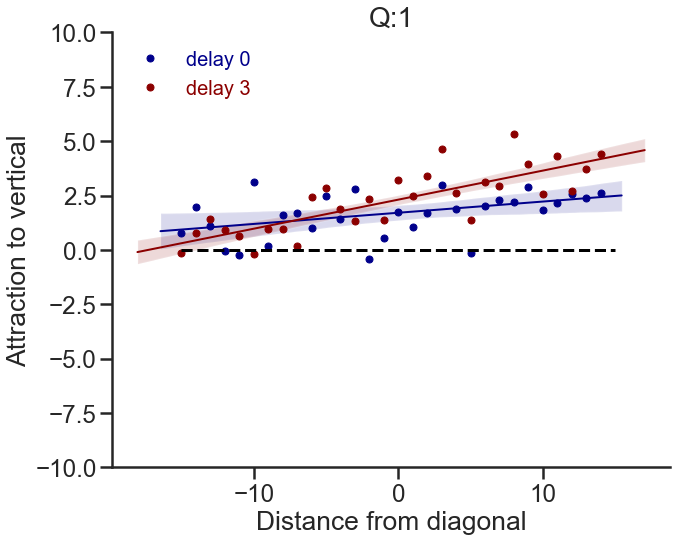

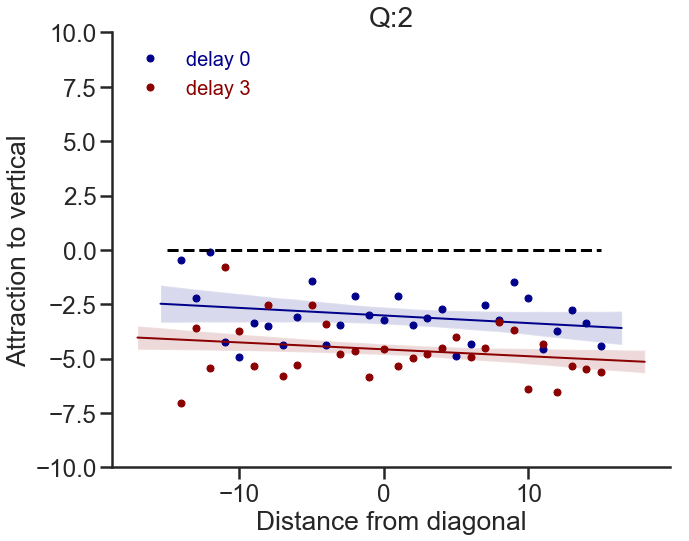

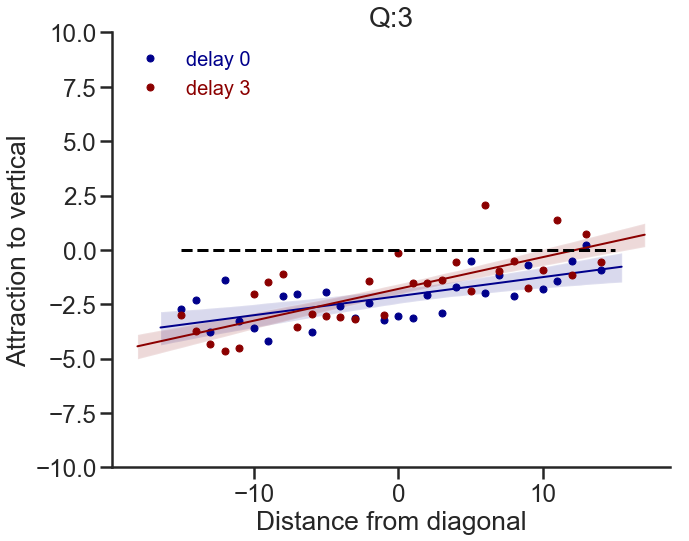

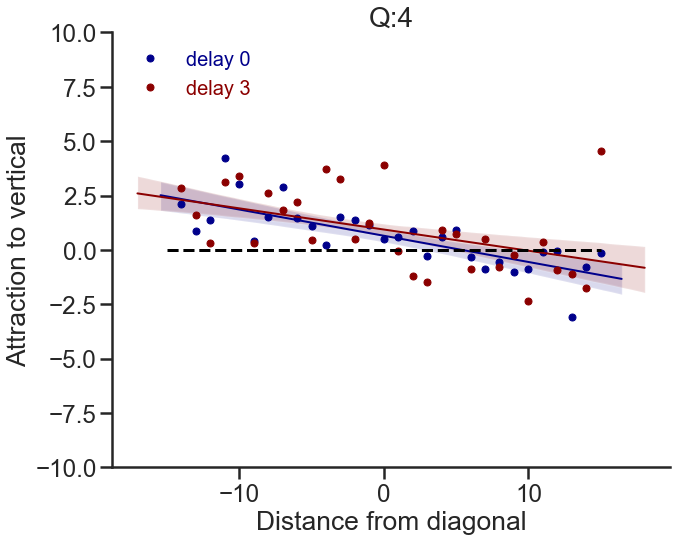

In [134]:
for Q in [1,2,3,4]:
    
    
    d_0 = []
    for d in df.loc[(df['delay']==0) & (df['quadrant']==Q) ,'A_T_aligned_center'].unique():
        d0_mean = df.loc[(df['A_T_aligned_center']==d) & (df['delay']==0) & (df['quadrant']==Q) ].A_err.mean()
        d_0.append([d, d0_mean])
    #
    d_0 = np.array(d_0)


    d_3 = []
    for d in df.loc[(df['delay']==3) & (df['quadrant']==Q)  ,'A_T_aligned_center'].unique():
        d3_mean = df.loc[(df['A_T_aligned_center']==d) & (df['delay']==3) & (df['quadrant']==Q) ].A_err.mean()
        d_3.append([d, d3_mean])

    #
    d_3 = np.array(d_3)
    
    
    fig = plt.figure(figsize=(10,8))

    sns.regplot('A_T_aligned_center', 'A_err', df.loc[(df['delay']==0) & (df['quadrant']==Q)], 
                line_kws={'linewidth':2}, color='darkblue',  scatter_kws={'s':0},
                ci = 95)

    plt.plot(d_0[:,0], d_0[:,1], 'o', color='darkblue', label='delay 0', markersize=7)


    sns.regplot('A_T_aligned_center', 'A_err', df.loc[(df['delay']==3) & (df['quadrant']==Q)],
                line_kws={'linewidth':2}, color='darkred',  scatter_kws={'s':0},
                ci = 68)

    plt.plot(d_3[:,0], d_3[:,1], 'o', color='darkred', label='delay 0',  markersize=7)


    plt.title('Q:' + str(Q), size=28)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().get_xaxis().tick_bottom()
    plt.gca().get_yaxis().tick_left()
    plt.ylabel('Attraction to vertical')
    plt.xlabel('Distance from diagonal')
    plt.gca().legend()
    plt.plot([-15,15], [0,0], 'k--')
    plt.ylim(-10,10)

    hue_order=['delay 0', 'delay 3']
    palette =['darkblue', 'darkred']

    l = plt.legend(loc=2, frameon=False, prop={'size': 20})

    for i_h, h_idx in enumerate(hue_order):
        l.get_texts()[i_h].set_text(h_idx)
        l.legendHandles[i_h].set_visible(False);
        l.get_texts()[i_h].set_color(palette[i_h]);


    plt.show(block=False)

In [ ]:
## 2 items

In [46]:
def cw_ccw_detector(target, NT):
    #print [target, NT,get_quadrant(target),get_quadrant(NT) ]
    #it returns the relative position of the target respect the NT
    if abs(target-NT)<180:
        if target<NT: 
            o='cw'
        else: 
            o='ccw'
    else:
        if target<NT: 
            o='ccw'
        else: 
            o='cw'
    #Ecceptions
    Qt= get_quadrant(target)
    Qnt = get_quadrant(NT)
    if [Qt, Qnt ] == [1,4] : 
        o= 'ccw'
    if [Qt, Qnt] == [4,1] : 
        o= 'cw'
    
    return o


In [51]:
df_angle = data.loc[(data['type']==1) | (data['type']==2) ] ##angle

In [53]:
orients=[]
for i in range(0, len(df_angle)):
    at = df_angle['A_T'].iloc[i]
    ant = df_angle['A_NT'].iloc[i]
    orients.append(cw_ccw_detector(at, ant))

    
df_angle['cw_ccw']=orients
df_angle['dist_T_NT']=abs(df_angle['A_T']-df_angle['A_NT'])

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [151]:
from scipy.stats import norm


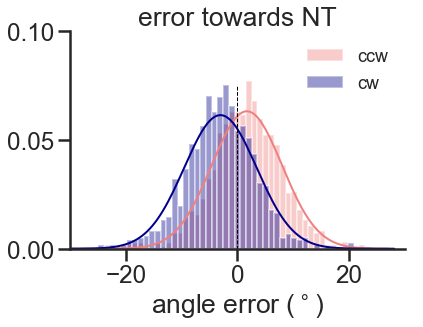

In [159]:

sns.distplot(df_angle.loc[df_angle['cw_ccw']=='cw', 'A_err'] , bins=np.linspace(-30,30,60), label='ccw',
              fit=norm, kde=False, fit_kws={"color":'lightcoral', 'linewidth':2},  color='lightcoral') #la direccion está al revés!

sns.distplot(df_angle.loc[df_angle['cw_ccw']=='ccw', 'A_err'] , bins=np.linspace(-30,30,60), label='cw',
              fit=norm, kde=False, fit_kws={"color":'darkblue', 'linewidth':2},  color='darkblue')


plt.title('')
plt.legend(frameon=False, loc=1, fontsize=18)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()
plt.xlabel(r'angle error ($^\circ$)')
plt.ylim(0, 0.1)
plt.xlim(-30,30)
plt.yticks([0,0.05, 0.1])
plt.plot([0,0], [0,0.075], 'k--', linewidth=1)
plt.title('error towards NT')

plt.savefig('C:\\Users\\David\\Desktop\\behaviour_distrib_cw_ccw.svg', transparent=True )


In [163]:
import scipy

a =df_angle.loc[df_angle['cw_ccw']=='cw', 'A_err']
b = df_angle.loc[df_angle['cw_ccw']=='ccw', 'A_err']
scipy.stats.ttest_ind(a, b)

Ttest_indResult(statistic=18.13999855964677, pvalue=5.081558137173024e-69)

In [ ]:
fig = plt.figure(figsize=(10,8))


sns.regplot('dist_ax_T', 'inter_hor', ControlsL1.loc[ControlsL1['delay']==0],  x_estimator=np.mean, ci = 68, label='delay0')
sns.regplot('dist_ax_T', 'inter_hor', ControlsL1.loc[ControlsL1['delay']==3], color='g', x_estimator=np.mean, ci = 68, label='delay3')

    
plt.title('Axis attraction - Distance & Delay', size=18)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().get_xaxis().tick_bottom()
plt.gca().get_yaxis().tick_left()
plt.ylabel('Attraction ref')
plt.xlabel('Distance')
plt.gca().legend()
plt.plot([30,45], [0,0], 'k--')
plt.show(block=False)


result_cont = smf.mixedlm(formula="inter_hor ~ dist_ax_T*delay", data=ControlsL1, groups='subject').fit() #subj_sess  SubjectName
print(result_cont.summary())